<div align="center" style="color:red;font-size:30px">Model to predict the insurance policy amount</div>


#### Importing libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RepeatedKFold,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("DS3_C6_S1_Regression_Insurance_Data_Project.csv")
df.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,190.000000,53.130000,5.000000,63770.428010


#### Data cleaning

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df["classif"].value_counts()

OB1     387
PREO    383
N       226
OB2     224
OB3      91
UW       19
Name: classif, dtype: int64

In [9]:
df["classif"].value_counts()

OB1     387
PREO    383
N       226
OB2     224
OB3      91
UW       19
Name: classif, dtype: int64

In [10]:
df[df["classif"].isnull()]

,age,sex,bmi,classif,children,smoker,region,charges
15,19,male,24.600,NaN,1,no,southwest,1837.23700
74,44,male,27.400,NaN,2,no,southwest,7726.85400
128,32,female,17.765,NaN,2,yes,northwest,32734.18630
173,35,female,34.800,NaN,1,no,southwest,5246.04700
559,19,male,35.530,NaN,0,no,northwest,1646.42970
671,29,female,31.160,NaN,0,no,northeast,3943.59540
839,59,female,31.350,NaN,0,no,northwest,12622.17950
1331,23,female,33.400,NaN,0,no,southwest,10795.93733


In [11]:
pd.pivot_table(data=df,index="classif",values="bmi")

,bmi
classif,
N,22.628451
OB1,32.335827
OB2,37.189375
OB3,43.103791
PREO,27.616710
UW,17.555789


In [12]:
df.dropna(inplace=True)

In [13]:
#filling null values in classif according to bmi values
conditions=[(df["bmi"]<=18.335),(df["bmi"]<=25) & (df["bmi"]>18.335),(df["bmi"]<=29.925)&(df["bmi"]>25),(df["bmi"]<=34.96)&(df["bmi"]>29.925),(df["bmi"]<=40)&(df["bmi"]>34.96),df["bmi"]>40]
values=["UW","N","PREO","OB1","OB2","OB3"]
df["classif"]=np.select(conditions,values)

In [14]:
c=df.select_dtypes(include="object").columns.tolist()

In [15]:
for i in c:
    print(df[i].value_counts())

male      673
female    657
Name: sex, dtype: int64
OB1     387
PREO    383
N       226
OB2     224
OB3      91
UW       19
Name: classif, dtype: int64
no     1057
yes     273
Name: smoker, dtype: int64
southeast    364
northeast    323
northwest    322
southwest    321
Name: region, dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x21275008190>,
 'caps': [<matplotlib.lines.Line2D at 0x212750087f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21274fece80>],
 'medians': [<matplotlib.lines.Line2D at 0x21275008cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21275008fa0>],
 'means': []}

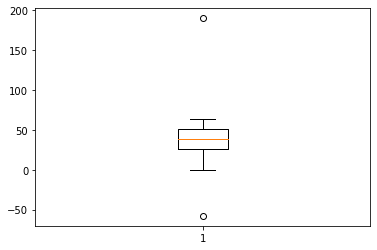

In [16]:
#age column has some unusual data. removing that
plt.boxplot(df["age"])

In [17]:
df.drop(df[df["age"]<=0].index,inplace=True)

In [18]:
df.drop(df[df["age"]>100].index,inplace=True)

#### Data Visualization

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

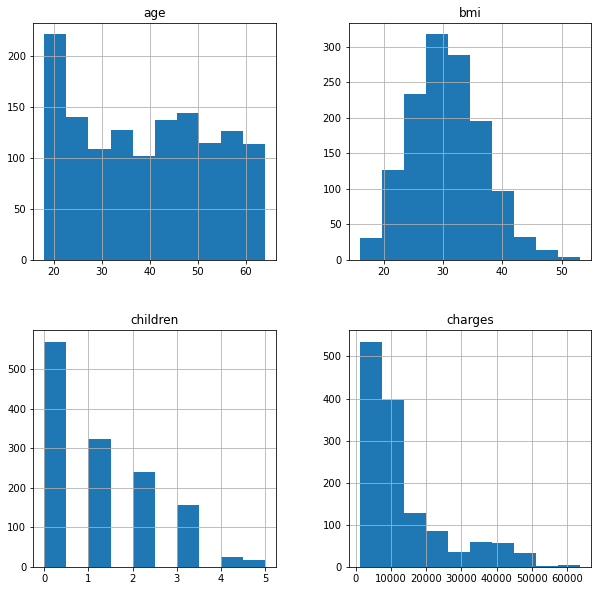

In [420]:
df.hist(figsize=(10,10))

In [421]:
#bmi is normally distributed and age is kinda uniformly distributed other than first bin 
#number of children = 0 is highest and data points is  also  highest in the first bin <10000 for charges

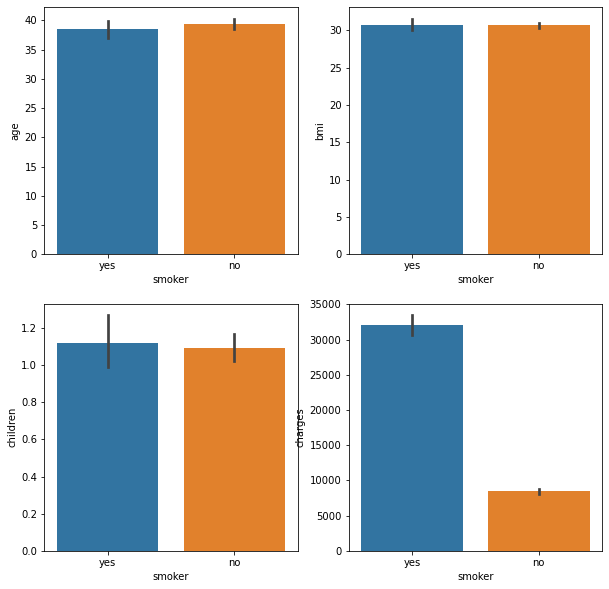

In [422]:
n=1
plt.figure(figsize=(10,10))
for i in df.select_dtypes(exclude="object").columns.tolist():
    plt.subplot(2,2,n)
    sns.barplot(data=df,y=i,x="smoker")
    n=n+1

In [423]:
#Here we can how numerical values are distributed wrt smoker.
#only charges is getting affected from this variable and rest means are similar for smoker and non smoker

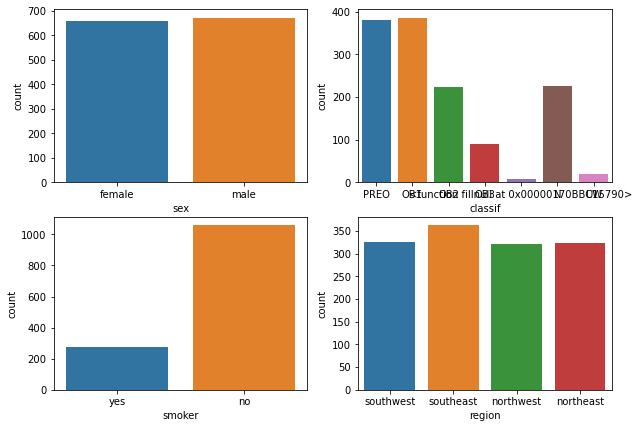

In [424]:
plt.figure(figsize=(10,7))
n=1
for i in c:
    plt.subplot(2,2,n)
    sns.countplot(data=df,x=i)
    n=n+1

In [425]:
#in above visuals we can count plots of categorical variables 
#majority are non smokers.
#both the genders have almost equal count
#southeast region has highest count
#and in classif OB1 category followed by PRE0 has high count

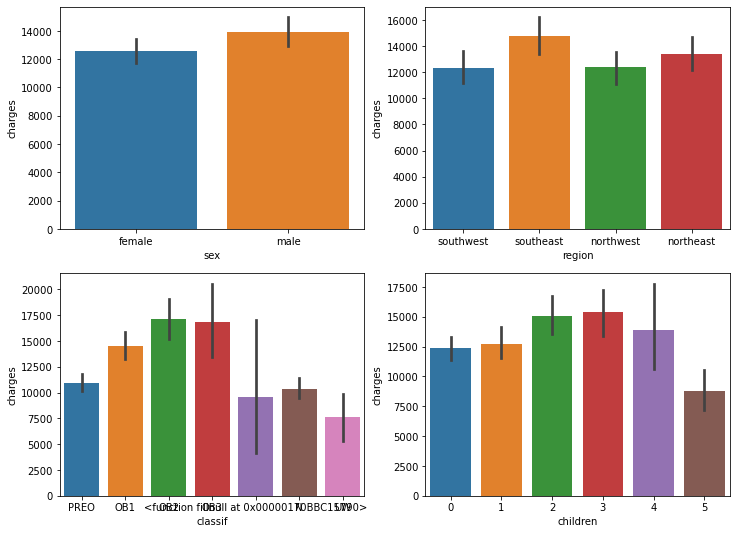

In [426]:
n=1
plt.figure(figsize=(12,9))
for i in df[["sex","region","classif","children"]]:
    plt.subplot(2,2,n)
    sns.barplot(data=df,y="charges",x=i)
    n=n+1

In [427]:
#In the above graphs we can how charges wrt different disrete variables
#gender and region doesnt seem to much affect the charges
#while obese people are having high charges
#and people with no of children as 3 has high charges

<AxesSubplot:xlabel='sex', ylabel='charges'>

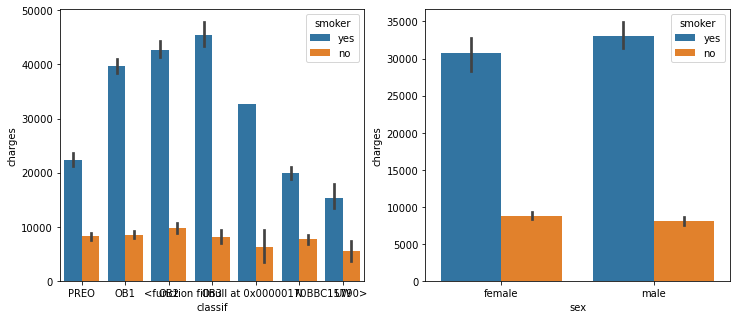

In [428]:
#multivariate analysis 
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(data=df,x='classif',y="charges",hue="smoker")
plt.subplot(122)
sns.barplot(data=df,x='sex',y="charges",hue="smoker")

In [429]:
#from multivariate analysis above, we can see how charges are distributed for various bmi level and gender
#male smokers have high charges
#obese smokers have high charges
#but this is not giving any new information other than what we have before since charges doesnt have much affect on parameters others than bmi,smoker and age


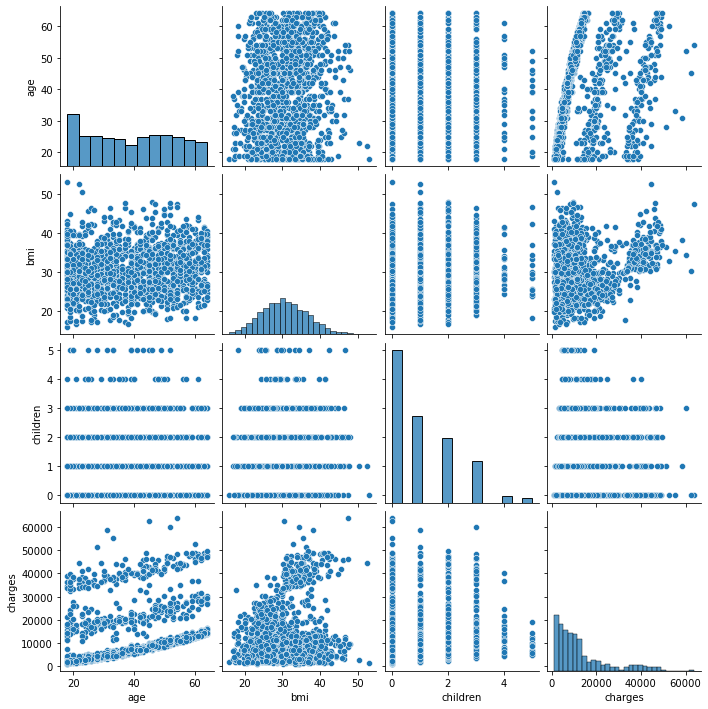

In [430]:
sns.pairplot(df)

In [431]:
#here we can see how numerical features are scattered
#charges is correlated with bmi and age to some extent lets check their corr values 

In [432]:
df.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.90,PREO,0,yes,southwest,16884.9240
1,18,male,33.77,OB1,1,no,southeast,1725.5523
2,28,male,33.00,OB1,3,no,southeast,4449.4620
4,32,male,28.88,PREO,0,no,northwest,3866.8552
5,31,female,25.74,PREO,0,no,southeast,3756.6216


#### Feature Engineering

In [483]:
#label encoding to convert categorical to numerical
for i in c:
    df[i]=LabelEncoder().fit_transform(df[i])

In [ ]:
#plotting correlation matrix
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#here with respect to our target variable charges , smoker is highly correlated followed by age and bmi

In [ ]:
df.isnull().sum()

In [ ]:
df2=df.iloc[:,:-1]
y=df["charges"]

In [484]:
#Normalizing the features
df=pd.DataFrame(MinMaxScaler().fit_transform(df2),columns=df2.columns)

In [ ]:
df.head()

In [485]:
#x=df.iloc[:,:-1]
#considering only 3 highly correlated features
x=df[["smoker","bmi","age"]]

In [486]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [487]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((933, 3), (400, 3), (933,), (400,))

### Cross validations and tuning hyperparameters to select best algorithm and their best parameters

In [294]:
#defining our cross validation technique as repeated k fold with 10folds and 10repeats
cv=RepeatedKFold(n_splits=10,n_repeats=10,random_state=1)

- Linear Regression:

In [297]:
model1=LinearRegression()
score1=cross_val_score(model1,x,y,cv=cv,scoring="r2").mean()
score1

0.7415575621763371

In [ ]:
#checked performance of LR with different features and these were best even with correlation 
#here we can see linear regression model has mean coefficient of determination R^2 as 74% for different pairs 

- Decision tree regressor:

In [299]:
dtc=DecisionTreeRegressor()
p={'max_depth':[4,5,6,7],'min_samples_leaf':[21,22,23,24,20,25]}
gs=GridSearchCV(estimator=dtc,param_grid=p,scoring="r2",n_jobs=-1,cv=cv)
gs.fit(x_train,y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=1),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'min_samples_leaf': [21, 22, 23, 24, 20, 25]},
             scoring='r2')

In [300]:
gs.best_params_

{'max_depth': 4, 'min_samples_leaf': 20}

In [301]:
gs.best_score_

0.858762422824214

In [ ]:
#checked for best parameters to build the decision tree and found its best score as 85.8% 
#this is better than pervious linear regression

In [308]:
#just considering the default hyperparameters for decision tree and chekcing its mean R^2 for different pairs 
model1=DecisionTreeRegressor()
score1=cross_val_score(model1,x,y,cv=cv,scoring="r2").mean()
score1

0.6898921971737967

- Random forest Regressor

In [303]:
rf=RandomForestRegressor()

In [304]:
p={'max_depth':[2,3,4,5,6,7],'min_samples_leaf':[5,6,7,8,9],'n_estimators':[40,50,60,100]}
gs=GridSearchCV(estimator=rf,param_grid=p,scoring="r2",n_jobs=-1,cv=10)
gs.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'n_estimators': [40, 50, 60, 100]},
             scoring='r2')

In [305]:
gs.best_params_

{'max_depth': 4, 'min_samples_leaf': 6, 'n_estimators': 50}

In [306]:
gs.best_score_

0.8615329075282357

In [307]:
#without hyperparameter tuning

In [309]:
model1=RandomForestRegressor()
score1=cross_val_score(model1,x,y,cv=cv,scoring="r2").mean()
score1

0.8069504930333082

In [ ]:
#Random forest regressor with default parameters is not good
#used gridsearchcv to find its best parameters and performance and found it better than using single tree with mean R^2 around 86%

- adaboost and stacking

In [311]:
#checking mean score for boosting techinque with adaboost regressor
model1=AdaBoostRegressor()
score1=cross_val_score(model1,x,y,cv=cv,scoring="r2").mean()
score1

0.8139234346480093

In [312]:
#using stacking with level0 base models as knn,decision tree and support vector regressor
#using linear regression as meta model 
level0=[("knn",KNeighborsRegressor()),("dtr",DecisionTreeRegressor()),("svr",SVR())]
level1=LinearRegression()
model=StackingRegressor(estimators=level0,final_estimator=level1,cv=5)
cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
score4=cross_val_score(model,x,y,scoring="r2",cv=cv,n_jobs=-1)
score4.mean()

0.823229942121624

In [313]:
#using hyperparamter for decision tree as found in gscv
level0=[("knn",KNeighborsRegressor()),("dtr",DecisionTreeRegressor(max_depth=4, min_samples_leaf=20)),("svr",SVR())]
level1=LinearRegression()
model=StackingRegressor(estimators=level0,final_estimator=level1,cv=5)
cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
score4=cross_val_score(model,x,y,scoring="r2",cv=cv,n_jobs=-1)
score4.mean()

0.8508333087882344

In [ ]:
#stacking is highly complex with respect to execution but it gave less R^2 than the random forest regressor
#Adaboost regressor gave mean R^2 around 81% which is not good compared to others

Coefficient of Determination found for various techniques:
- Linear Regression:0.74
- Decision Tree:0.69
- Decsion Tree after tuning:0.85
- Random Forest:0.81
- Random Forest after tuning:0.86
- Adaboost:0.81
- Stacking:0.82

Conclusions:
- Considering 3 features smoker,bmi,age for modelling gave better results
- Linear Regression was not efficient enough to predict the charges
- Decision Tree and Random Forest with default parameters are also not efficient
- By tuning them wrt maximum depth , number of estimators ,minimum sample leaf from grid search cv we will get better results
- Adaboost Stacking was also not good enough considering their Execution compexity and time required.
- Best among all Random Forest with tuned parameters max depth as 4 , min samples leaf=6 will be considered for buiding the final model

### Model Building with the best algorithm and its best parameter for this dataset : Random Forest Regressor

In [488]:
model=RandomForestRegressor(max_depth=4,min_samples_leaf=6,n_estimators=100).fit(x_train,y_train)

In [315]:
#Training R^2
model.score(x_train,y_train)

0.8828592830361025

In [316]:
#Test R^2
model.score(x_test,y_test)

0.8318386674222656

In [317]:
y_pred=model.predict(x_test)

In [356]:
#Mean Squared Error
mse=mean_squared_error(y_test,y_pred)
mse

25323250.19006743

In [354]:
#Mean Absolute Error
mae=mean_absolute_error(y_test,y_pred)
mae

2718.228135218505

In [355]:
#Root Mean Squre Error
rmse=np.sqrt(mse)
rmse

5032.221198443827

In [321]:
#Charges Actual vs predicted by model
pd.DataFrame({"actual y":y_test,"predicted y":y_pred})

,actual y,predicted y
901,48673.5588,48859.070288
1065,7045.4990,7313.820707
1254,4415.1588,6633.455889
300,6746.7425,6733.506493
239,7152.6714,9048.309383
...,...,...
864,8782.4690,11612.699575
711,10107.2206,11650.551812
664,27037.9141,25885.143490
1102,3471.4096,5453.524600


In [350]:
residuals=y_test-y_pred

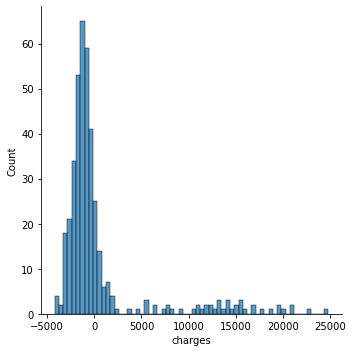

In [351]:
#plot of residuals of our model
sns.displot(residuals)

- Built the final model using Random Forest Regressor with hyperparameters got from gridsearch cv method
- Model has coefficient of determination around 83%.So model is a good model to predict the insurance charges.



### Pipeline

In [19]:
x=df[["smoker","bmi","age"]]
x.head()

,smoker,bmi,age
0,yes,27.90,19
1,no,33.77,18
2,no,33.00,28
4,no,28.88,32
5,no,25.74,31


In [20]:
y=df["charges"]
y.head()

0    16884.9240
1     1725.5523
2     4449.4620
4     3866.8552
5     3756.6216
Name: charges, dtype: float64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
x_train.shape

(927, 3)

In [23]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')


In [24]:
trf1=ColumnTransformer([("encoder",OneHotEncoder(sparse=False,handle_unknown='ignore'),[0])],remainder="passthrough")
trf2=ColumnTransformer([("scaling",MinMaxScaler(),slice(0,4))])
trf3=RandomForestRegressor(max_depth=4,min_samples_leaf=6,n_estimators=100)

In [25]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [26]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  slice(0, 4, None))])),
                ('trf3',
                 RandomForestRegressor(max_depth=4, min_samples_leaf=6))])

In [27]:
pipe.score(x_train,y_train)

0.8707360564738038

In [28]:
pickle.dump(pipe,open('regression.pkl','wb'))

In [29]:
model=pickle.load(open('regression.pkl','rb'))

In [30]:
result=model.predict(np.array(['no',33.345,47]).reshape(1,3))

In [31]:
result[0]

9631.371195747377